# Practice 1: Tensor Operations & Autograd Engine

## Lecture Part

In [ ]:
import torch

In [ ]:
# Tensor Generations
t1 = torch.zeros(2,3)
print(t1)
t2 = torch.arange(4)
print(t2)
t3 = torch.rand(2,2)
print(t3)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([0, 1, 2, 3])
tensor([[0.6194, 0.7480],
        [0.0853, 0.0239]])


In [ ]:
# Tensor Attributes - shape, dtype, device
t = torch.zeros(2,3)
# t = torch.arange(4)
# t = torch.rand(2,2)
print(t)
print(t.shape)
print(t.dtype)
print(t.device)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
torch.Size([2, 3])
torch.float32
cpu


In [ ]:
# Tensor Attributes - .to(device)
t1 = torch.zeros(2,3)
print(t1.device)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
t1_gpu = t1.to(device)
print(t1_gpu.device)

cpu
cpu


In [ ]:
# Tensor Shape - reshape
t1 = torch.arange(6)
print(t1.shape)
print(t1)
t1_reshaped = t1.reshape(2,3)
print(t1_reshaped.shape)
print(t1_reshaped)

torch.Size([6])
tensor([0, 1, 2, 3, 4, 5])
torch.Size([2, 3])
tensor([[0, 1, 2],
        [3, 4, 5]])


In [ ]:
# Tensor Shape - squeeze, unsqueeze
t1 = torch.arange(6).reshape(2,3)
print(t1)
t1_unsqueeze = t1.unsqueeze(1)
print(f'<Using unsqueeze>\n{t1_unsqueeze.shape}\n{t1_unsqueeze}')
t1_reshape = t1.reshape(2,1,3)
print(f'<Using reshape>\n{t1_reshape.shape}\n{t1_reshape}')

tensor([[0, 1, 2],
        [3, 4, 5]])
<Using unsqueeze>
torch.Size([2, 1, 3])
tensor([[[0, 1, 2]],

        [[3, 4, 5]]])
<Using reshape>
torch.Size([2, 1, 3])
tensor([[[0, 1, 2]],

        [[3, 4, 5]]])


In [ ]:
# Tensor Shape - permute
t1 = torch.arange(6).reshape(2,3)
print(t1)

t1_reshape = t1.reshape(3,2)
t1_permute = t1.permute(1,0)
print(t1_reshape)
print(t1_permute)

tensor([[0, 1, 2],
        [3, 4, 5]])
tensor([[0, 1],
        [2, 3],
        [4, 5]])
tensor([[0, 3],
        [1, 4],
        [2, 5]])


In [ ]:
# Matrix Operations - multiplication
t1 = torch.arange(6).reshape(2,3)
t2 = torch.arange(12).reshape(4,3)
print(f'<t1>\n{t1}\n')
print(f'<t2>\n{t2}')

<t1>
tensor([[0, 1, 2],
        [3, 4, 5]])

<t2>
tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]])


In [ ]:
# Matrix Operations - multiplication
t2 = t2.transpose(0,1)
print(f'<t1> {t1.shape}')
print(f'<t2> {t2.shape}')

t3 = t1 @ t2
# Same as torch.matmul(t1, t2)
print(f'<t3> {t3.shape}')

<t1> torch.Size([2, 3])
<t2> torch.Size([3, 4])
<t3> torch.Size([2, 4])


In [ ]:
# Matrix Operations - argmax, sum
t1 = torch.tensor([
    [3,6,4],
    [2,4,7]
])
print(f'<t1>\nshape: {t1.shape}\n{t1}')

<t1>
shape: torch.Size([2, 3])
tensor([[3, 6, 4],
        [2, 4, 7]])


In [ ]:
# Matrix Operations - argmax, sum
row_argmax = torch.argmax(t1, dim=1)
row_argmax_keepdim = torch.argmax(t1, dim=1, keepdim=True)
row_sum = torch.sum(t1, dim=-1)
print(row_argmax)
print(row_argmax_keepdim)
print(row_sum)

tensor([1, 2])
tensor([[1],
        [2]])
tensor([13, 13])


In [ ]:
# Matrix Operations - argmax, sum
col_argmax = torch.argmax(t1, dim=0)
col_argmax_keepdim = torch.argmax(t1, dim=0, keepdim=True)
col_sum = torch.sum(t1, dim=0)
print(col_argmax)
print(col_argmax_keepdim)
print(col_sum)

tensor([0, 0, 1])
tensor([[0, 0, 1]])
tensor([ 5, 10, 11])


In [ ]:
# Matrix Operations - stack
x1 = torch.tensor([1,2,3])
x2 = torch.tensor([4,5,6])
print(x1.shape, x2.shape)
batch = torch.stack([x1, x2], dim=0)
stacked = torch.stack([x1, x2], dim=1)
print(f'<batch>\n{batch.shape}\n{batch}')
print(f'<stacked>\n{stacked.shape}\n{stacked}')

torch.Size([3]) torch.Size([3])
<batch>
torch.Size([2, 3])
tensor([[1, 2, 3],
        [4, 5, 6]])
<stacked>
torch.Size([3, 2])
tensor([[1, 4],
        [2, 5],
        [3, 6]])


In [ ]:
# Matrix Operations - cat
x1 = torch.tensor([1,2,3])
x2 = torch.tensor([4,5,6])
print(x1.shape, x2.shape)
concat = torch.cat([x1, x2], dim=0)
print(f'<concat>\n{concat.shape}\n{concat}')

torch.Size([3]) torch.Size([3])
<concat>
torch.Size([6])
tensor([1, 2, 3, 4, 5, 6])


In [ ]:
x = torch.tensor(-2.0, requires_grad = True)
y = torch.tensor(5.0, requires_grad = True)
z = torch.tensor(-4.0, requires_grad = True)
print(x.grad)
f = (x + y) * z
print(x.grad)

f.backward()

print(x.grad)
print(y.grad)
print(z.grad)

None
None
tensor(-4.)
tensor(-4.)
tensor(3.)


## Team Question


Referring the figure below, follow the guidelines.
1. X, Y, b1, b2 are vectors, w1 & w2 are matrices.
 - Sizes of X & Y are defined in the code, size of z1 is 5.
2. Cross-entropy loss is already implemented in the code.
3. Generate parameters(w1, b1, w2, b2) with torch.randn.
4. Print the gradients of parameters(w1, b1, w2, b2).

<img src = "https://drive.google.com/uc?id=1pyZiWipSU8v8NEoyfDDxIaRXOgNlFwon" height = 400>

In [ ]:
import torch
import torch.nn.functional as F
"""
You can use F.relu() for ReLU layer.
ex) y = F.relu(x)
"""

x = torch.ones(7) # (7)
y = torch.zeros(3) # (3)

# Generate w1, b1, w2, b2
########## Your Code #########
w1 = torch.randn(7,5, requires_grad=True) # (7) @ (7,5) = (5)
b1 = torch.randn(5, requires_grad=True) # (5)
w2 = torch.randn(5,3, requires_grad=True) # (5) @ (5,3) = (3)
b2 = torch.randn(3, requires_grad=True) # (3)
##############################

# Compute z1
########## Your Code #########
z1 = x @ w1 + b1 # (5)
##############################
# Compute z2
########## Your Code #########
z2 = F.relu(z1) # (5)
##############################
# Compute z3
########## Your Code #########
z3 = z2 @ w2 + b2 # (3)
##############################

# Calculate loss
loss = F.binary_cross_entropy_with_logits(z3, y)

# Backpropagation
########## Your Code #########
loss.backward()
##############################

# (4) Print the gradient of w and b
########## Your Code #########
print(w1.grad)
print(b1.grad)
print(w2.grad)
print(b2.grad)
##############################

tensor([[-0.2667,  0.3673,  0.2184,  0.3299,  0.0000],
        [-0.2667,  0.3673,  0.2184,  0.3299,  0.0000],
        [-0.2667,  0.3673,  0.2184,  0.3299,  0.0000],
        [-0.2667,  0.3673,  0.2184,  0.3299,  0.0000],
        [-0.2667,  0.3673,  0.2184,  0.3299,  0.0000],
        [-0.2667,  0.3673,  0.2184,  0.3299,  0.0000],
        [-0.2667,  0.3673,  0.2184,  0.3299,  0.0000]])
tensor([-0.2667,  0.3673,  0.2184,  0.3299,  0.0000])
tensor([[2.9693e-04, 1.2682e-01, 9.1460e-02],
        [5.5497e-04, 2.3703e-01, 1.7094e-01],
        [1.8701e-03, 7.9873e-01, 5.7602e-01],
        [2.4797e-03, 1.0591e+00, 7.6379e-01],
        [0.0000e+00, 0.0000e+00, 0.0000e+00]])
tensor([0.0008, 0.3273, 0.2361])


# Practice 2: Implementation of Simple Model Training

## Lecture Part

In [ ]:
from torch.utils.data import Dataset, DataLoader
import csv

class SimpleDataset(Dataset):
  def __init__(self, csv_file = None, root_dir = None):
    with open(csv_file) as file:
      self.annotations = file.readlines()
    self.root_dir = root_dir

  def __getitem__(self, idx):
    x_path, y = self.annotations[idx]
    x = self.read(x_path) # x can be image, numpy data, word, etc.
    return x, y

  def __len__(self):
    return len(self.annotations)

  def read(self, x_path):
    # Read image, numpy dat, word, etc.
    return x_path

dataset = SimpleDataset() # Error occurs since csv_file is None
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

In [ ]:
def my_collate_fn(data):
  max_len = 10
  batch = []
  for x, y in data:
    x_padded = torch.cat([x, torch.zeros(max_len-x.shape[0])])
    batch.append(x_padded)
  return torch.stack(batch, dim=0)

dataset = SimpleDataset() # Error occurs since csv_file is None
dataloader = DataLoader(dataset, batch_size=16, collate_fn = my_collate_fn, shuffle=True)

In [ ]:
import torch.nn as nn

class simple_model(nn.Module):
    def __init__(self):
        super(simple_model, self).__init__()
        self.fc_layer = nn.Linear(16, 64)
        self.relu = nn.functional.relu

    def forward(self, x):
        x = self.fc_layer(x)
        x = self.relu(x)
        return x

model = simple_model()
print(model)

simple_model(
  (fc_layer): Linear(in_features=16, out_features=64, bias=True)
)


In [ ]:
def train(model, scheduler, optim, loss_fn, train_loader, epochs, device):
    for epoch in range(epochs):
        train_loss = 0.0
        model.train() # Training mode
        for batch in train_loader:
            optim.zero_grad() # Set grad to zero for each batch

            input, target = batch_size
            # Copy input & target to device where model exists
            input = input.to(device)
            target = target.to(device)

            output = model(input) # Forward

            loss = loss_fn(output, target) # Loss function

            loss.backward() # Backpropagation

            optim.step() # Update parameters using defined optimizer

            train_loss += loss.detach().item()
        scheduler.step() # Update learning rate
        train_loss /= len(train_loader.dataset)
        print(f'Epoch: {epoch+1}, Training Loss: {train_loss}')

In [ ]:
def test(model, loss_fn, device):
    model.eval()
    test_loss = 0.0
    correct = 0

    with torch.no_grad():
        for batch in test_loader:
            input, target = batch
            input = input.to(device)
            target = target.to(device)

            output = model(input)

            loss = loss_fn(output, target)
            test_loss += loss.detach().item()

            pred = output.argmax(dim=1)
            correct += pred.eq(target.view_as(pred)).sum()
        test_loss /= len(test_loader.dataset)
        print(f'Test Loss: {test_loss},\
        \t Accuracy: {100. * correct / len(test_loader.dataset)}%')

## Team Question

Given the information below, build the model and train & evaluate it.
 Use torch.nn.functional.relu for activation layer.

- Input shape: (1, 28, 28)
- fc1: Apply a linear transformation using nn.Linear function. Size of the output features should be 128
- fc2: Apply a linear transformation using nn.Linear function. Size of the output features should be 64
- Classifier: Apply a linear transformation. Size of the output features should be class size (10)

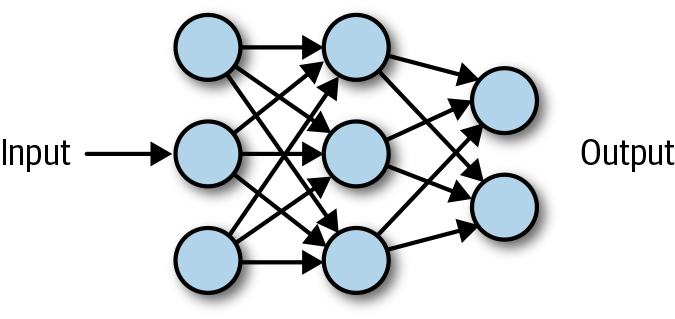

### Data Preparation

In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

# Run the codes to check the result.

# Set dataset
train_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

# Set dataloader
batch_size = 64
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

In [ ]:
import matplotlib.pyplot as plt

examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)
print("example data shape: ", example_data.shape)

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])

### Implement Simple Neural Network

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class Simple_NN(nn.Module):
    '''
    Define the model using below information.
    We need to use ReLU between linear layers.
    - input shape: (1, 28, 28)
    - fc1: apply a linear transformation. output features should be 128
    - fc2: apply a linear transformation. output features should be 64
    - classifier: apply a linear transformation. output features should be the class size (10)

    * model : input -> fc1 -> relu -> fc2 -> relu -> classifier
    * You can use nn.Linear() for fc layer
     ex) fc = nn.Linear(input_dim, output_dim)
         y = fc(x)
    '''
    def __init__(self):
        super(Simple_NN, self).__init__()
        ########## Your Code ##########
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.classifier = nn.Linear(64, 10)
        ###############################

    def forward(self, x):
        x = x.reshape(-1, 784) # Note: To apply fc layer, input should be flattened
        ########## Your Code ##########
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.classifier(x)
        ###############################
        return x

model = Simple_NN()
print(model)

In [ ]:
from tqdm import tqdm

def train(model, scheduler, optim, loss_fn, train_loader, epochs, device):
    for epoch in range(epochs):
        train_loss = 0.0

        # (1) Set the mode
        ########## Your Code ##########
        model.train()
        ##############################

        for batch in tqdm(train_loader):
            # (2) Initialize Gradients
            ########## Your Code #########
            optim.zero_grad()
            ##############################

            input, target = batch

            # (3) Change the device of the input and target to device where model exists
            ########## Your Code #########
            input = input.to(device)
            target = target.to(device)
            ##############################

            # (4) Get output
            ########## Your Code #########
            output = model(input)
            ##############################

            # (5) Get loss using loss_fn
            loss = loss_fn(output, target)

            # (6) Do Backpropagation
            ########## Your Code #########
            loss.backward()
            ##############################

            # (7) Update the optimizer (hint: use the argument optim and its method step)
            ########## Your Code #########
            optim.step()
            ##############################

            train_loss += loss.detach().item()

        # (8) Update the scheduler
        ########## Your Code #########
        scheduler.step()
        ##############################
        train_loss /= len(train_loader.dataset)

        print(f'Epoch: {epoch+1}, Training Loss: {train_loss}')

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"device is {device}\n")

num_epochs = 3

import torch.optim as optim

optimizer = optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)

model.to(device)

train(model, scheduler, optimizer, nn.CrossEntropyLoss(), train_loader, num_epochs, device)

In [ ]:
def test(model, loss_fn, test_loader, device):
    # Set the mode
    ########## Your Code ##########
    model.eval()
    ##############################
    correct = 0

    with torch.no_grad():
        for batch in tqdm(test_loader):
            input, target = batch
            # Change the device of input & target
            ########## Your Code ##########
            input = input.to(device)
            target = target.to(device)
            ###############################

            # Get output using the model
            ########## Your Code ##########
            output = model(input)
            ###############################

            # Get accuracy using the output and target
            # Hint: output shape is [batch_size x 10]
            ########## Your Code ##########
            pred = output.argmax(dim=1)
            ###############################

            correct += pred.eq(target.data.view_as(pred)).sum()

    print(f'\nAccuracy: {round(float(100. * correct / len(test_loader.dataset)), 2)}%')

In [ ]:
test(model, nn.CrossEntropyLoss(), test_loader, device)